code using https://medium.com/@ermolushka/text-clusterization-using-python-and-doc2vec-8c499668fa61

In [1]:
import os, gensim

In [3]:
genres = ['ballads', 'elegies', 'songs', 'novels']
all_texts = []
true_labels = []
files = []
i = 0

for genre in genres:

    filenames = os.listdir('../datasets/lemmatized/' + genre)

    for file in filenames:
        with open('../datasets/lemmatized/' + genre + '/' + file, 'r', encoding='utf-8') as f:
            tokens = f.read().split()
   
        all_texts.append(gensim.models.doc2vec.TaggedDocument(tokens, [i]))
        true_labels.append(genre)
        files.append(file)

        i += 1

In [4]:
all_texts[:2]

[TaggedDocument(words=['тенист', 'и', 'прохладный', 'брайнгельский', 'там', 'плескаться', 'грета', 'душист', 'ветерок', 'там', 'берег', 'пестреет', 'усеять', 'цвет', 'и', 'ходить', 'девица', 'как', 'рыбка', 'стадами', 'мой', 'конь', 'разыграться', 'пред', 'башня', 'тот', 'где', 'замок', 'дальтонский', 'стоить', 'за', 'стена', 'и', 'в', 'замок', 'на', 'башня', 'стоять', 'девица', 'души', 'мой', 'радость', 'и', 'сердце', 'царица', 'тенист', 'и', 'прохладный', 'брайнгельский', 'там', 'плескаться', 'грета', 'душист', 'ветерок', 'туда', 'мой', 'эдмонд', 'мне', 'девица', 'сказать', 'с', 'тобой', 'за', 'тебя', 'я', 'бы', 'трон', 'променять', 'ах', 'солнце', 'мой', 'я', 'ей', 'молвить', 'с', 'тоска', 'ты', 'знать', 'ли', 'кто', 'я', 'твой', 'гость', 'часовой', 'то', 'тайна', 'но', 'солнце', 'высокий', 'пора', 'мне', 'мне', 'ехать', 'далеко', 'тенист', 'и', 'прохладный', 'брайнгельский', 'там', 'плескаться', 'грета', 'душист', 'о', 'милый', 'не', 'сан', 'надежда', 'чаровать', 'на', 'сердце', 'г

In [5]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=40, workers=5)

In [6]:
model.build_vocab(all_texts)

In [7]:
model.train(all_texts, total_examples=model.corpus_count, epochs=40)

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=100) 
X = kmeans_model.fit(model.dv.vectors)
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(model.dv.vectors)
pca = PCA(n_components=2).fit(model.dv.vectors)
datapoint = pca.transform(model.dv.vectors)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
from sklearn import metrics

print("Homogeneity:", metrics.homogeneity_score(true_labels, kmeans_model.labels_))
print("Completeness:", metrics.completeness_score(true_labels, kmeans_model.labels_))
print("V-measure:", metrics.v_measure_score(true_labels, kmeans_model.labels_))
print("Adjusted Rand-Index:", metrics.adjusted_rand_score(true_labels, kmeans_model.labels_))
print("Silhouette Coefficient:", metrics.silhouette_score(model.dv.vectors, kmeans_model.labels_, sample_size=2000))

Homogeneity: 0.42333301724971756
Completeness: 0.6356514264358107
V-measure: 0.5082081004620822
Adjusted Rand-Index: 0.28384337866218834
Silhouette Coefficient: 0.37757602


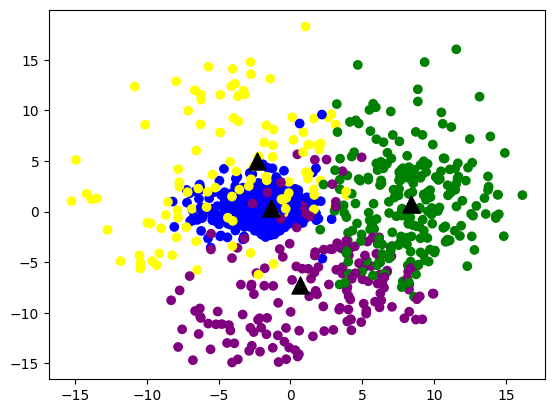

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
label1 = ['#FFFF00', '#008000', '#0000FF', '#800080']
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()